#Importing libraries and reading data

In [1]:
pip --version

pip 23.3.2 from c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\pip (python 3.11)

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
print(sklearn.__version__)


1.3.2


In [3]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [4]:
#Reading the data into the dataframe 'df' and viewing the first 10 rows
df = pd.read_csv("apartments.csv")
df.head(10)

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,FlattorentinRiverside,"RiversideDrNairobi,Riverside,Nairobi",3,3,200000,PerMonth
1,1,FlattorentinKileleshwa,"Kileleshwa,Nairobi",3,4,70000,PerMonth
2,2,FlattorentinNyali,"LinksRdMombasa,Nyali,Mombasa",3,2,38000,PerMonth
3,3,FlattorentinLavington,"NearValleyArcade,Lavington,Nairobi",3,3,80000,PerMonth
4,4,FlattorentinKileleshwa,"Kileleshwa,Nairobi",1,1,110000,PerMonth
5,5,FlattorentinKahawaWendani,"ThikaRdNairobi,KahawaWendani,Nairobi",4,2,57750,PerMonth
6,6,FlattorentinKilimani,"Kilimani,Nairobi",2,3,65000,PerMonth
7,7,FlattorentinWestlands,Westlands,3,3,78000,PerMonth
8,8,FlattorentinNyali,"Nyali,Mombasa",1,1,5000,PerDay
9,9,FlattorentinMuthaiga,"Muthaiga,Nairobi",4,5,300000,PerMonth


#Preprocessing

In [5]:
#Checking for null values
df.isna().sum()

Unnamed: 0    0
title         0
location      0
bedrooms      0
bathrooms     0
price         0
rate          0
dtype: int64

In [6]:
# Removing rows that contain the value 'per day' in the rate column since the model intends to wokr only with apartments that are rented for a month
df = df.drop(df[df['rate'] == 'Per Day'].index)
df.head(15)

,Unnamed: 0,title,location,bedrooms,bathrooms,price,rate
0,0,FlattorentinRiverside,"RiversideDrNairobi,Riverside,Nairobi",3,3,200000,PerMonth
1,1,FlattorentinKileleshwa,"Kileleshwa,Nairobi",3,4,70000,PerMonth
2,2,FlattorentinNyali,"LinksRdMombasa,Nyali,Mombasa",3,2,38000,PerMonth
3,3,FlattorentinLavington,"NearValleyArcade,Lavington,Nairobi",3,3,80000,PerMonth
4,4,FlattorentinKileleshwa,"Kileleshwa,Nairobi",1,1,110000,PerMonth
5,5,FlattorentinKahawaWendani,"ThikaRdNairobi,KahawaWendani,Nairobi",4,2,57750,PerMonth
6,6,FlattorentinKilimani,"Kilimani,Nairobi",2,3,65000,PerMonth
7,7,FlattorentinWestlands,Westlands,3,3,78000,PerMonth
8,8,FlattorentinNyali,"Nyali,Mombasa",1,1,5000,PerDay
9,9,FlattorentinMuthaiga,"Muthaiga,Nairobi",4,5,300000,PerMonth


In [7]:
# Identifying the unique values in the location column
df['location'].unique()

array(['RiversideDrNairobi,Riverside,Nairobi', 'Kileleshwa,Nairobi',
       'LinksRdMombasa,Nyali,Mombasa',
       'NearValleyArcade,Lavington,Nairobi',
       'ThikaRdNairobi,KahawaWendani,Nairobi', 'Kilimani,Nairobi',
       'Westlands', 'Nyali,Mombasa', 'Muthaiga,Nairobi',
       'Westlands,Nairobi', 'KikuyuTownBusparkKikuyu,Kikuyu,Kikuyu',
       'Shanzu,Mombasa', 'Westlandsdowntown,Westlands,Nairobi',
       'Hurlingham', 'KileleshwaNairobi,Kileleshwa,Nairobi',
       'GrevilleaGroveSpringValley,SpringValley,Nairobi', 'Nyali',
       'Vihigaroad,Kileleshwa,Nairobi', 'OffOthayaroad,Lavington,Nairobi',
       'Jabavucourt,Kilimani,Nairobi'], dtype=object)

In [8]:
#Removing rows with the specified values from the data set since they are outside the location region for the system
df = df.drop(df.loc[df['location'].isin(['Links Rd Mombasa, Nyali, Mombasa','Shanzu, Mombasa', 'Nyali, Mombasa'])].index)


In [9]:
#Removing unnecessary columns: The rate column is dropped since it doesn't provide any additional information (all the properties are rented for a month)
df = df.drop(['Unnamed: 0', 'rate'], axis=1)
len(df.axes[0])
df.head()

,title,location,bedrooms,bathrooms,price
0,FlattorentinRiverside,"RiversideDrNairobi,Riverside,Nairobi",3,3,200000
1,FlattorentinKileleshwa,"Kileleshwa,Nairobi",3,4,70000
2,FlattorentinNyali,"LinksRdMombasa,Nyali,Mombasa",3,2,38000
3,FlattorentinLavington,"NearValleyArcade,Lavington,Nairobi",3,3,80000
4,FlattorentinKileleshwa,"Kileleshwa,Nairobi",1,1,110000


##Encoding the dataset

In [10]:
label_encoder = LabelEncoder()
label_encoder.fit(df['location'])
df['location'] = label_encoder.transform(df['location'])

In [11]:
df.head()

,title,location,bedrooms,bathrooms,price
0,FlattorentinRiverside,13,3,3,200000
1,FlattorentinKileleshwa,4,3,4,70000
2,FlattorentinNyali,7,3,2,38000
3,FlattorentinLavington,9,3,3,80000
4,FlattorentinKileleshwa,4,1,1,110000


#Clustering


##Kmeans Clustering


####Clusering without PCA

In [12]:
X = df[['location','bedrooms','bathrooms','price']].copy()
#scaling
scaler = MinMaxScaler()
X[['location','bedrooms','bathrooms','price']] = scaler.fit_transform(X[['location','bedrooms','bathrooms','price']])
X

,location,bedrooms,bathrooms,price
0,0.684211,0.666667,0.50,0.661017
1,0.210526,0.666667,0.75,0.220339
2,0.368421,0.666667,0.25,0.111864
3,0.473684,0.666667,0.50,0.254237
4,0.210526,0.000000,0.00,0.355932
...,...,...,...,...
2515,0.315789,0.666667,0.50,0.237288
2516,0.526316,0.666667,0.25,0.135593
2517,0.000000,0.333333,0.50,0.203390
2518,0.421053,1.000000,1.00,1.000000


In [13]:
#using the elbow method to determine the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarni

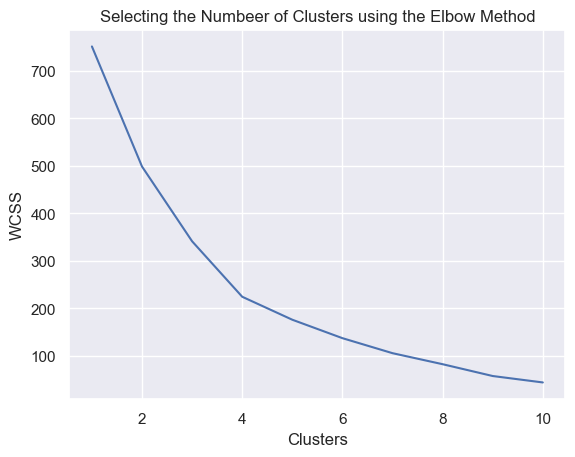

In [14]:
sns.set()
plt.plot(range(1, 11), wcss)
plt.title('Selecting the Numbeer of Clusters using the Elbow Method')
plt.xlabel('Clusters')
plt.ylabel('WCSS')
plt.show()

In [15]:
#from the above elbow diagram the optimal number of clusters is 4
kmeans = KMeans(n_clusters=4)
predicted = kmeans.fit_predict(X)
print(predicted)

[2 1 1 ... 1 3 2]


c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [16]:
df['cluster'] = predicted
df

,title,location,bedrooms,bathrooms,price,cluster
0,FlattorentinRiverside,13,3,3,200000,2
1,FlattorentinKileleshwa,4,3,4,70000,1
2,FlattorentinNyali,7,3,2,38000,1
3,FlattorentinLavington,9,3,3,80000,1
4,FlattorentinKileleshwa,4,1,1,110000,0
...,...,...,...,...,...,...
2515,FlattorentinKilimani,6,3,3,75000,1
2516,FlattorentinNyali,10,3,2,45000,1
2517,FlattorentinSpringValley,0,2,3,65000,1
2518,FlattorentinMuthaiga,8,4,5,300000,3


##Training


In [17]:
y = df.cluster

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25)

In [19]:
from sklearn.model_selection import GridSearchCV
clf = GridSearchCV(SVC(gamma = 'auto'),
                   {
                      'C':[0.001,0.01,0.1, 1, 10, 100, 1000],
                      'kernel':['rbf', 'linear']
                   }, cv=5, return_train_score=False)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'kernel': ['rbf', 'linear']})

In [20]:
df_1 = pd.DataFrame(clf.cv_results_)
df_1

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.098932,0.017771,0.097930,0.014813,0.001,rbf,"{'C': 0.001, 'kernel': 'rbf'}",0.465608,0.465608,0.465608,0.462963,0.462963,0.464550,0.001296,13
1,0.066189,0.009006,0.015954,0.003487,0.001,linear,"{'C': 0.001, 'kernel': 'linear'}",0.465608,0.465608,0.465608,0.462963,0.462963,0.464550,0.001296,13
2,0.108854,0.025162,0.101778,0.020998,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.613757,0.621693,0.608466,0.632275,0.605820,0.616402,0.009612,12
3,0.077963,0.011349,0.015525,0.000232,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.859788,0.849206,0.849206,0.851852,0.843915,0.850794,0.005184,11
4,0.054437,0.006342,0.075137,0.009477,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,4
5,0.036264,0.006467,0.003124,0.006248,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,4
6,0.011846,0.006057,0.012075,0.006093,1,rbf,"{'C': 1, 'kernel': 'rbf'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,4
7,0.003140,0.006279,0.006234,0.007636,1,linear,"{'C': 1, 'kernel': 'linear'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,4
8,0.008321,0.010830,0.003336,0.006672,10,rbf,"{'C': 10, 'kernel': 'rbf'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,4
9,0.000000,0.000000,0.005829,0.007171,10,linear,"{'C': 10, 'kernel': 'linear'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,4


In [21]:
clf_2 = GridSearchCV(SVC(gamma = 'auto'),
                   {
                      'C':[0.01,0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09],
                      'kernel':['rbf', 'linear']
                   }, cv=5, return_train_score=False)
clf_2.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08,
                               0.09],
                         'kernel': ['rbf', 'linear']})

In [22]:
df_2 = pd.DataFrame(clf_2.cv_results_)
df_2

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.089593,0.013934,0.105732,0.021089,0.01,rbf,"{'C': 0.01, 'kernel': 'rbf'}",0.613757,0.621693,0.608466,0.632275,0.605820,0.616402,0.009612,18
1,0.054090,0.012007,0.011856,0.006196,0.01,linear,"{'C': 0.01, 'kernel': 'linear'}",0.859788,0.849206,0.849206,0.851852,0.843915,0.850794,0.005184,16
2,0.093286,0.019028,0.083111,0.008997,0.02,rbf,"{'C': 0.02, 'kernel': 'rbf'}",0.859788,0.849206,0.849206,0.851852,0.843915,0.850794,0.005184,16
3,0.041897,0.012832,0.009929,0.008154,0.02,linear,"{'C': 0.02, 'kernel': 'linear'}",0.955026,0.949735,0.944444,0.952381,0.941799,0.948677,0.004907,12
4,0.076406,0.005700,0.079134,0.009625,0.03,rbf,"{'C': 0.03, 'kernel': 'rbf'}",0.904762,0.896825,0.902116,0.899471,0.891534,0.898942,0.004551,15
5,0.043853,0.010622,0.013668,0.003330,0.03,linear,"{'C': 0.03, 'kernel': 'linear'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,1
6,0.086544,0.010987,0.092795,0.027037,0.04,rbf,"{'C': 0.04, 'kernel': 'rbf'}",0.955026,0.949735,0.944444,0.952381,0.941799,0.948677,0.004907,12
7,0.029805,0.001362,0.009914,0.005954,0.04,linear,"{'C': 0.04, 'kernel': 'linear'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,1
8,0.058462,0.005980,0.084984,0.009921,0.05,rbf,"{'C': 0.05, 'kernel': 'rbf'}",0.955026,0.949735,0.944444,0.952381,0.941799,0.948677,0.004907,12
9,0.034198,0.007600,0.009304,0.006238,0.05,linear,"{'C': 0.05, 'kernel': 'linear'}",1.000000,0.994709,0.992063,1.000000,0.989418,0.995238,0.004233,1


In [23]:
#from the the above gridsearchCV I have decided to go with C= 0.04, and kernel function 'rbf'
model=SVC(kernel='rbf', C=0.04, probability=True)
model.fit(X_train, y_train)

SVC(C=0.04, probability=True)

In [24]:
from joblib import dump
dump(model, '../SavedModel/model.joblib')

['../SavedModel/model.joblib']

In [25]:
y_pred_cluster = model.predict([[13,2,3,45000]])
y_pred_prob = model.predict_proba([[13,2,3,45000]])
print(y_pred_cluster)
print(y_pred_prob)

[2]
[[0.14894794 0.03927716 0.78213971 0.02963518]]


c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
c:\Users\HomePC\Documents\rental-website\.venv\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [26]:
# f1_score(y_test, y_pred,average = None)
# accuracy_score(y_test, y_pred, normalize=False)
# cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# disp.plot()
# plt.show()

#MAUT Assiging numerical weight to each variable

In [27]:
%pip install pyDecision

Note: you may need to restart the kernel to use updated packages.


In [28]:
import numpy as np

from pyDecision.algorithm import maut_method

In [29]:
df_1 = df.iloc[:500,1:-1]
df_1

,location,bedrooms,bathrooms,price
0,13,3,3,200000
1,4,3,4,70000
2,7,3,2,38000
3,9,3,3,80000
4,4,1,1,110000
...,...,...,...,...
495,3,3,3,55000
496,14,1,1,55000
497,19,2,2,75000
498,1,2,2,75000


In [30]:
# MAUT

# Weights
weights = [0.2, 0.3, 0.2, 0.3]

# Load Criterion Type: 'max' or 'min'
criterion_type    = ['min', 'max', 'min', 'max']

# Load Utility Functions: 'exp'; 'ln'; 'log'; 'quad' or 'step'
utility_functions = ['exp', 'exp', 'exp', 'exp']

a1: 0.238
a2: 0.214
a3: 0.245
a4: 0.179
a5: 0.324
a6: 0.398
a7: 0.13
a8: 0.143
a9: 0.222
a10: 0.646
a11: 0.222
a12: 0.447
a13: 0.256
a14: 0.213
a15: 0.118
a16: 0.287
a17: 0.197
a18: 0.21
a19: 0.211
a20: 0.261
a21: 0.128
a22: 0.238
a23: 0.214
a24: 0.245
a25: 0.179
a26: 0.324
a27: 0.324
a28: 0.398
a29: 0.13
a30: 0.143
a31: 0.646
a32: 0.222
a33: 0.447
a34: 0.256
a35: 0.213
a36: 0.118
a37: 0.287
a38: 0.197
a39: 0.21
a40: 0.211
a41: 0.261
a42: 0.128
a43: 0.238
a44: 0.214
a45: 0.245
a46: 0.179
a47: 0.324
a48: 0.398
a49: 0.13
a50: 0.143
a51: 0.646
a52: 0.222
a53: 0.447
a54: 0.447
a55: 0.256
a56: 0.213
a57: 0.118
a58: 0.287
a59: 0.197
a60: 0.21
a61: 0.211
a62: 0.261
a63: 0.128
a64: 0.238
a65: 0.214
a66: 0.245
a67: 0.179
a68: 0.324
a69: 0.398
a70: 0.13
a71: 0.143
a72: 0.646
a73: 0.222
a74: 0.447
a75: 0.256
a76: 0.213
a77: 0.118
a78: 0.287
a79: 0.447
a80: 0.197
a81: 0.21
a82: 0.211
a83: 0.261
a84: 0.128
a85: 0.238
a86: 0.214
a87: 0.245
a88: 0.179
a89: 0.324
a90: 0.398
a91: 0.13
a92: 0.213
a93: 0

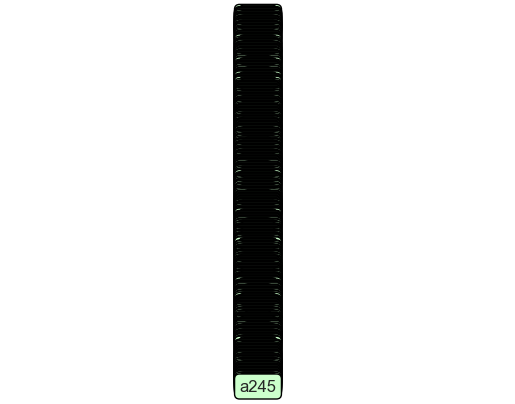

In [31]:
rank = maut_method(df_1, weights, criterion_type, utility_functions)